# Library: Seaborn

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

## Installation

In [1]:
#!pip install seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns

In [2]:
#shows graphic without 'plt.show()'
%matplotlib inline 

In [3]:
# loading databases
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [5]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Statistical relationships

## relplots

`` sns.relplot(x=None, y=None, hue=None, size=None, style=None, data=None, row=None, col=None, col_wrap=None, row_order=None, col_order=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=None, dashes=None, style_order=None, legend='brief', kind='scatter', height=5, aspect=1, facet_kws=None, **kwargs)``

This function provides access to several different axes-level functions that show the relationship between two variables with semantic mappings of subsets. The kind parameter selects the underlying axes-level function to use:

* scatterplot() (with kind="scatter"; the default)

* lineplot() (with kind="line")


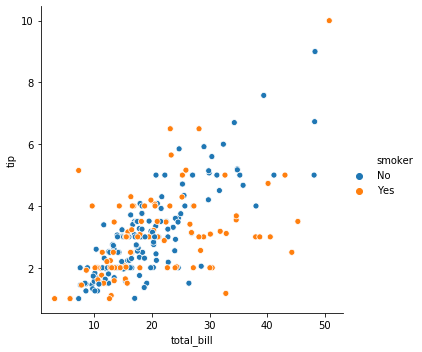

In [6]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

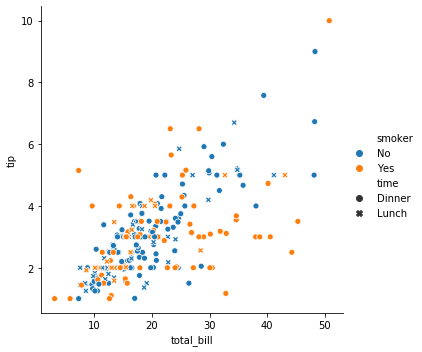

In [7]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips);

## scatterplots

``sns.scatterplot(x=None, y=None, hue=None, style=None, size=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, x_bins=None, y_bins=None, units=None, estimator=None, ci=95, n_boot=1000, alpha='auto', x_jitter=None, y_jitter=None, legend='brief', ax=None, **kwargs)``

The most familiar way to visualize a bivariate distribution is a scatterplot, where each observation is shown with point at the x and y values. This is analogous to a rug plot on two dimensions. You can draw a scatterplot with scatterplot(), and it is also the default kind of plot shown by the jointplot() function:

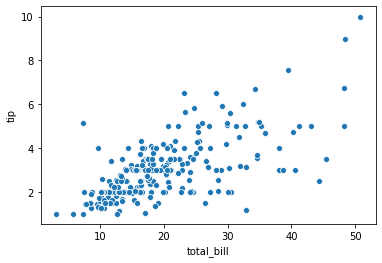

In [8]:
sns.scatterplot(x='total_bill',y='tip',data=tips)

## lineplot

``sns.lineplot(x=None, y=None, hue=None, size=None, style=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, dashes=True, markers=None, style_order=None, units=None, estimator='mean', ci=95, n_boot=1000, seed=None, sort=True, err_style='band', err_kws=None, legend='brief', ax=None, **kwargs)``

The relationship between x and y can be shown for different subsets of the data using the hue, size, and style parameters. These parameters control what visual semantics are used to identify the different subsets. It is possible to show up to three dimensions independently by using all three semantic types, but this style of plot can be hard to interpret and is often ineffective. Using redundant semantics (i.e. both hue and style for the same variable) can be helpful for making graphics more accessible.

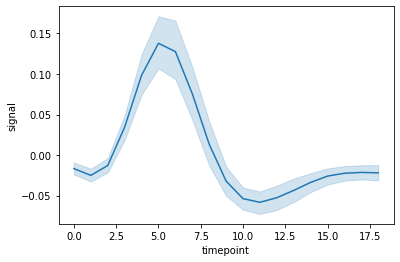

In [9]:
fmri = sns.load_dataset("fmri")
sns.lineplot(x="timepoint", y="signal", data=fmri)

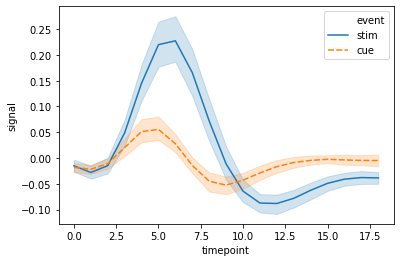

In [10]:
sns.lineplot(x="timepoint", y="signal", hue="event", style="event", data=fmri)

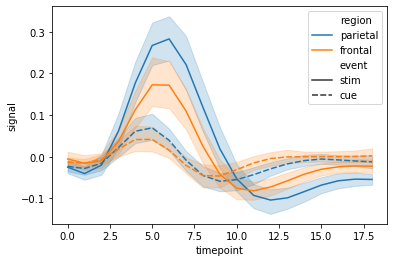

In [11]:
sns.lineplot(x="timepoint", y="signal", hue="region", style="event", data=fmri)

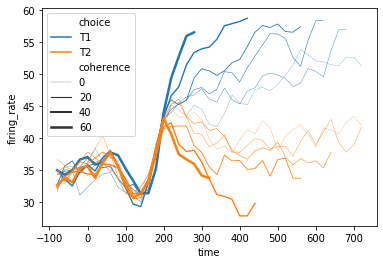

In [12]:
dots = sns.load_dataset("dots").query("align == 'dots'")
sns.lineplot(x="time", y="firing_rate", size="coherence", hue="choice", sizes=(.25, 2.5), data=dots)

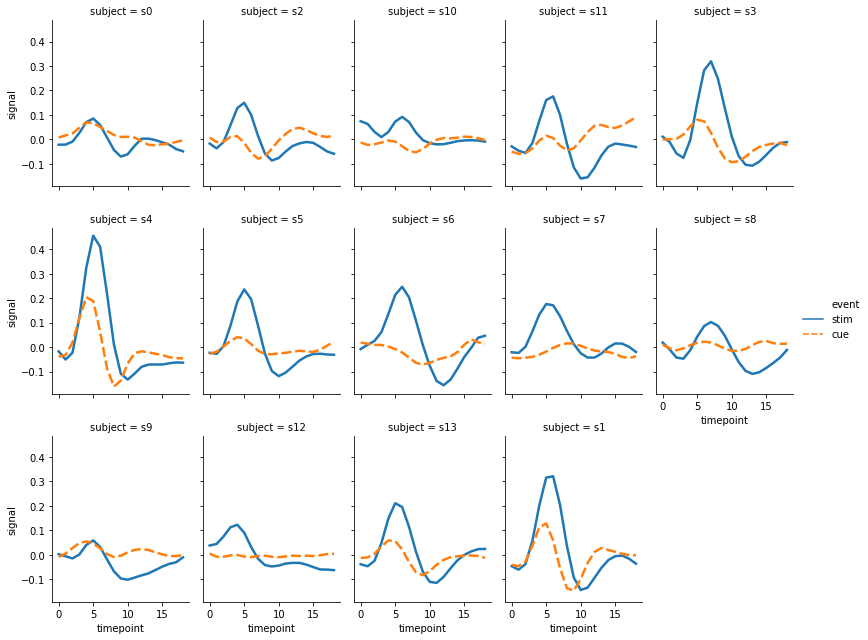

In [13]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"))

# Linear relationships

## regplot

``sns.regplot(x, y, data=None, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, dropna=True, x_jitter=None, y_jitter=None, label=None, color=None, marker='o', scatter_kws=None, line_kws=None, ax=None)``

Plot data and a linear regression model fit.
There are a number of mutually exclusive options for estimating the regression model.

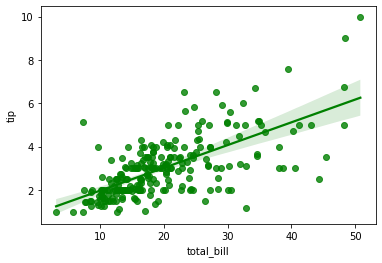

In [14]:
sns.regplot(tips['total_bill'], tips['tip'], color="g")

## lmplot

``sns.lmplot(x, y, data, hue=None, col=None, row=None, palette=None, col_wrap=None, height=5, aspect=1, markers='o', sharex=True, sharey=True, hue_order=None, col_order=None, row_order=None, legend=True, legend_out=True, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, seed=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=True, x_jitter=None, y_jitter=None, scatter_kws=None, line_kws=None, size=None)``

This function combines regplot() and FacetGrid. It is intended as a convenient interface to fit regression models across conditional subsets of a dataset.

When thinking about how to assign variables to different facets, a general rule is that it makes sense to use hue for the most important comparison, followed by col and row. However, always think about your particular dataset and the goals of the visualization you are creating.

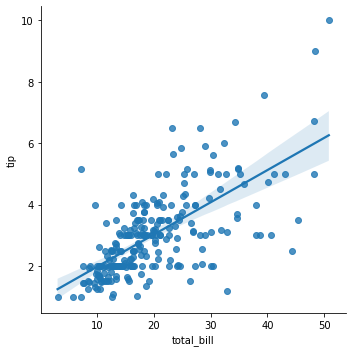

In [15]:
sns.lmplot(x="total_bill", y="tip", data=tips)

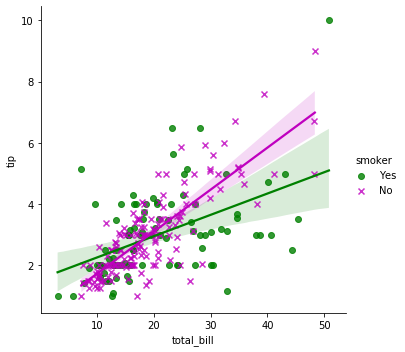

In [16]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips, markers=["o", "x"], palette=dict(Yes="g", No="m"))

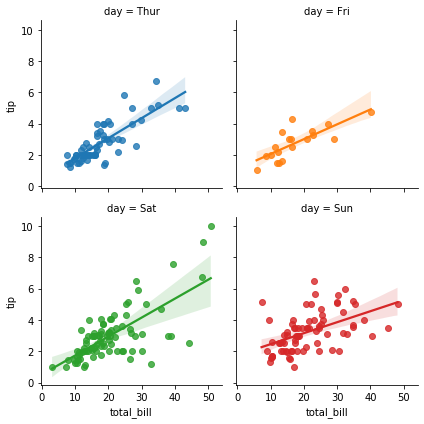

In [17]:
g = sns.lmplot(x="total_bill", y="tip", col="day", hue="day", data=tips, col_wrap=2, height=3)

# Distribution Plots

## Univariant distribution

### distplot

``sns.displot(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)``

The most convenient way to take a quick look at a univariate distribution in seaborn is the distplot() function. By default, this will draw a histogram and fit a kernel density estimate (KDE).

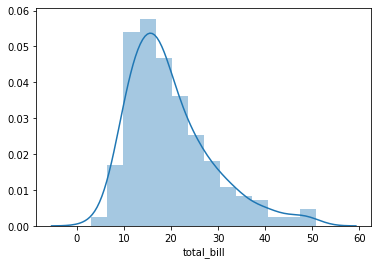

In [18]:
sns.distplot(tips['total_bill'])

A histogram represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin. <br>
When drawing histograms, the main choice you have is the number of bins to use and where to place them. distplot() uses a simple rule to make a good guess for what the right number is by default, but trying more or fewer bins might reveal other features in the data:

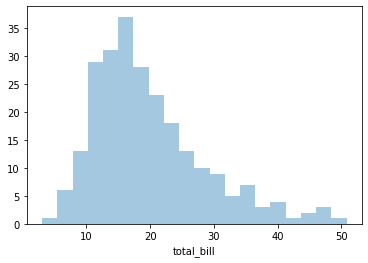

In [19]:
#removing kde layer and defining customized bins
sns.distplot(tips['total_bill'],kde=False,bins=20)

### kdeplot / rugplot

``sns.kdeplot(data, data2=None, shade=False, vertical=False, kernel='gau', bw='scott', gridsize=100, cut=3, clip=None, legend=True, cumulative=False, shade_lowest=True, cbar=False, cbar_ax=None, cbar_kws=None, ax=None, **kwargs)``

``sns.rugplot(a, height=0.05, axis='x', ax=None, **kwargs)``

Like the histogram, the KDE plots encode the density of observations on one axis with height along the other axis.
kdeplots are [Kernel Density Estimation plots](http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth). These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value.

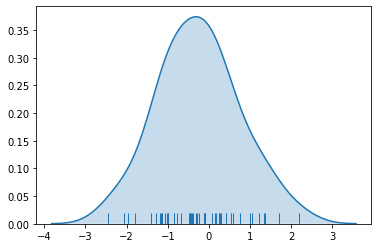

In [20]:
#Create dataset
x = np.random.randn(50)

sns.kdeplot(x, shade = True)
sns.rugplot(x)

Drawing a KDE is more computationally involved than drawing a histogram. What happens is that each observation is first replaced with a normal (Gaussian) curve centered at that value:

(0, 1)

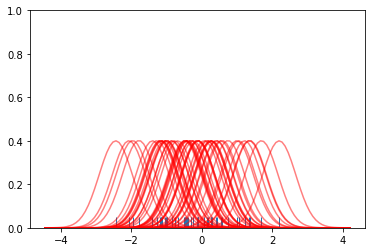

In [21]:
# Create another rugplot
sns.rugplot(x);

# Set up the x-axis for the plot
x_min = x.min() - 2
x_max = x.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

bandwidth = ((4*x.std()**5)/(3*len(x)))**.2 #http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth

# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in x:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'r',alpha=0.5)
    
plt.ylim(0,1)

Next, these curves are summed to compute the value of the density at each point in the support grid. The resulting curve is then normalized so that the area under it is equal to 1:

Text(0.5, 0.98, 'Sum of the Basis Functions')

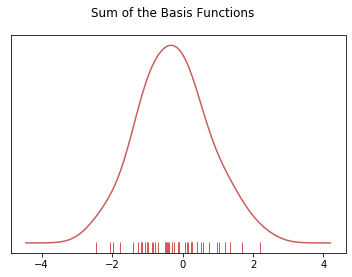

In [22]:
# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(x,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

We can see that if we use the kdeplot() function in seaborn, we get the same curve. This function is used by distplot(), but it provides a more direct interface with easier access to other options when you just want the density estimate:

## Bivariant distribution

### jointplot

``sns.jointplot(x, y, data=None, kind='scatter', stat_func=None, color=None, height=6, ratio=5, space=0.2, dropna=True, xlim=None, ylim=None, joint_kws=None, marginal_kws=None, annot_kws=None, **kwargs)``

``sns.JointGrid(x, y, data=None, height=6, ratio=5, space=0.2, dropna=True, xlim=None, ylim=None, size=None)``

It can also be useful to visualize a bivariate distribution of two variables. The easiest way to do this in seaborn is to just use the jointplot() function, which creates a multi-panel figure that shows both the bivariate (or joint) relationship between two variables along with the univariate (or marginal) distribution of each on separate axes.


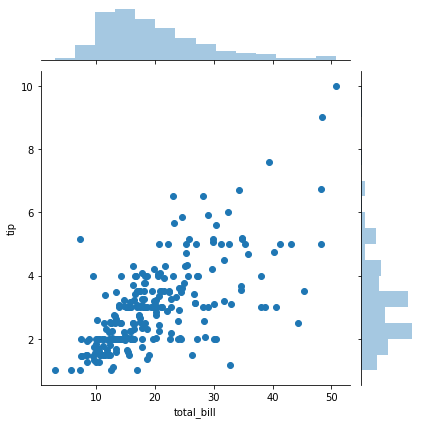

In [23]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')

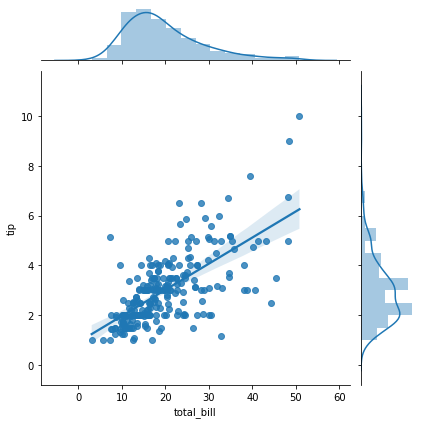

In [24]:
#regression + kde
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

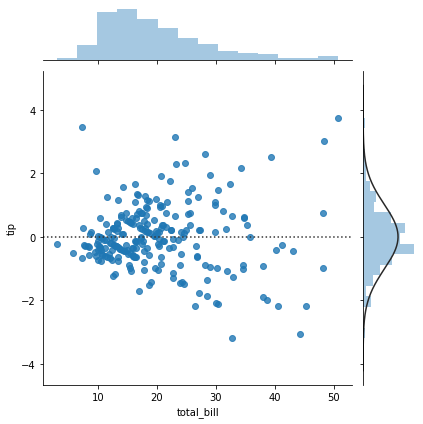

In [25]:
#normalized using regression
sns.jointplot(x='total_bill',y='tip',data=tips,kind='resid')

#### Hexbin plots

A bivariate analogue of a histogram is known as a “hexbin” plot, because it shows the counts of observations that fall within hexagonal bins. This plot works best with relatively large datasets. It’s available through in matplotlib as matplotlib.axes.Axes.hexbin() and as a style in jointplot().

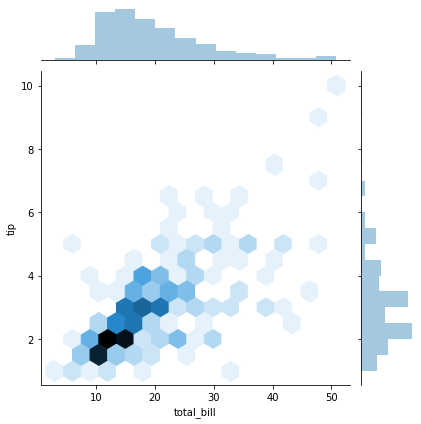

In [26]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

#### Kernel density estimation

It is also possible to use the kernel density estimation procedure described above to visualize a bivariate distribution.<br>
You can also draw a two-dimensional kernel density plot with the kdeplot() function.

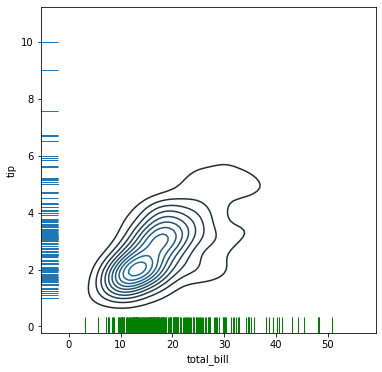

In [27]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(tips['total_bill'], tips['tip'], ax=ax)
sns.rugplot(tips['total_bill'], color="g", ax=ax)
sns.rugplot(tips['tip'], vertical=True, ax=ax);

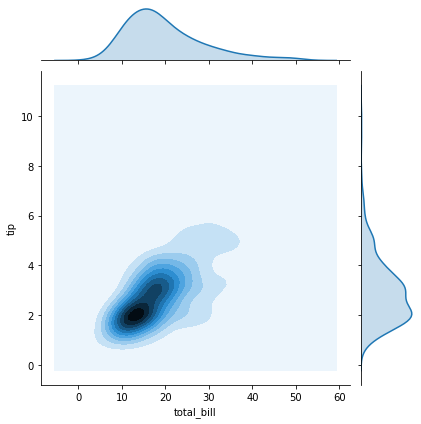

In [28]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde')

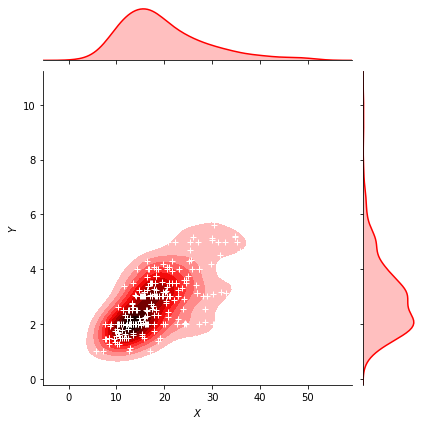

In [29]:
g = sns.jointplot(x='total_bill', y='tip',data=tips, kind="kde", color="red")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

## Visualizing pairwise relationships in a dataset

### pairplot

``sns.pairplot(data, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None, size=None)``

``sns.PairGrid(data, hue=None, hue_order=None, palette=None, hue_kws=None, vars=None, x_vars=None, y_vars=None, corner=False, diag_sharey=True, height=2.5, aspect=1, layout_pad=0, despine=True, dropna=True, size=None)``

Pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns).<br>
This creates a matrix of axes and shows the relationship for each pair of columns in a DataFrame. By default, it also draws the univariate distribution of each variable on the diagonal Axes:

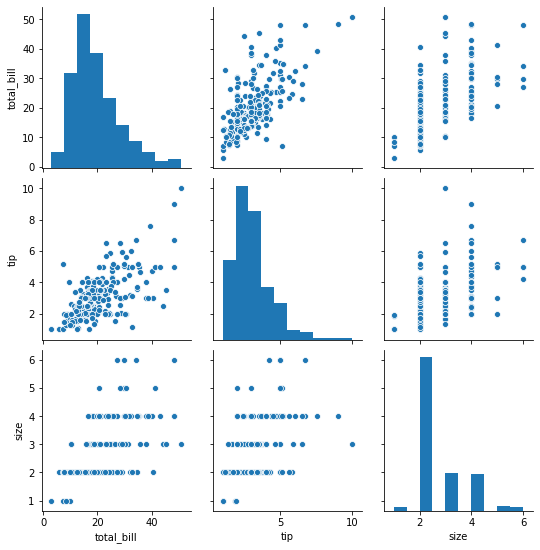

In [30]:
#Quantitative variables relation 
sns.pairplot(tips)

Specifying the hue parameter automatically changes the histograms to KDE plots to facilitate comparisons between multiple distributions.

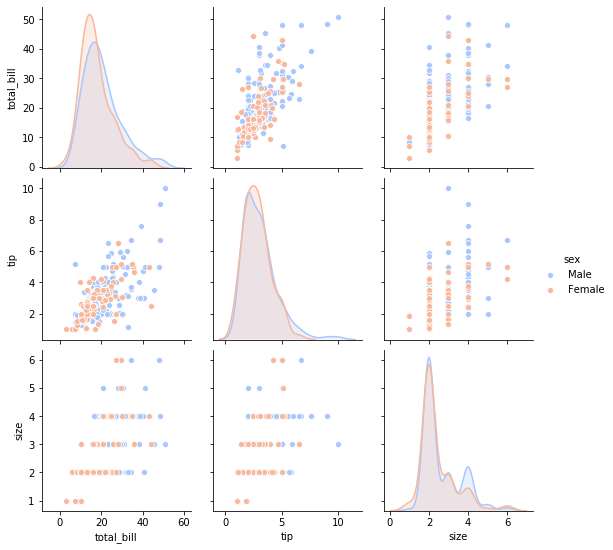

In [31]:
#Quantitative variables relation colored by qualitative data
sns.pairplot(tips,hue='sex',palette='coolwarm')

Much like the relationship between jointplot() and JointGrid, the pairplot() function is built on top of a PairGrid object, which can be used directly for more flexibility:

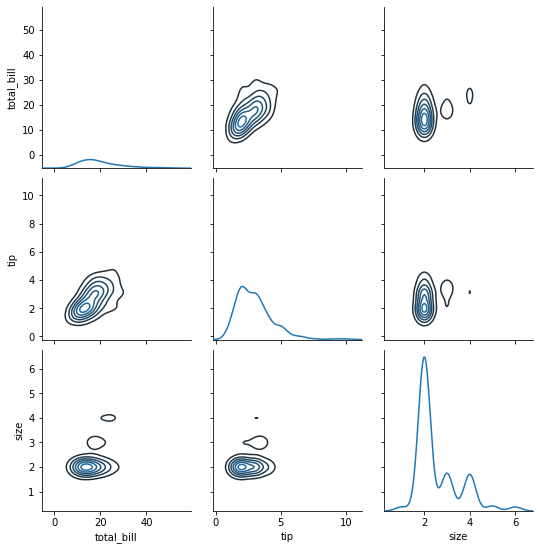

In [32]:
g = sns.PairGrid(tips)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);

# Categorical plots

## catplot

``sns.catplot(x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, estimator=<function mean at 0x105c7d9e0>, ci=95, n_boot=1000, units=None, seed=None, order=None, hue_order=None, row_order=None, col_order=None, kind='strip', height=5, aspect=1, orient=None, color=None, palette=None, legend=True, legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, **kwargs)``

The default representation of the data in catplot() uses a scatterplot.

This function provides access to several axes-level functions that show the relationship between a numerical and one or more categorical variables using one of several visual representations. The kind parameter selects the underlying axes-level function to use:

Categorical estimate plots:

* pointplot() (with kind="point")

* barplot() (with kind="bar")

* countplot() (with kind="count")
    
Categorical distribution plots:

* boxplot() (with kind="box")

* violinplot() (with kind="violin")

* boxenplot() (with kind="boxen")
    
Categorical scatterplots:

* stripplot() (with kind="strip"; the default)

* swarmplot() (with kind="swarm")

## pointplot

``sns.pointplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean at 0x105c7d9e0>, ci=95, n_boot=1000, units=None, seed=None, markers='o', linestyles='-', dodge=False, join=True, scale=1, orient=None, color=None, palette=None, errwidth=None, capsize=None, ax=None, **kwargs) ``

A point plot represents an estimate of central tendency for a numeric variable by the position of scatter plot points and provides some indication of the uncertainty around that estimate using error bars.

Point plots can be more useful than bar plots for focusing comparisons between different levels of one or more categorical variables. They are particularly adept at showing interactions: how the relationship between levels of one categorical variable changes across levels of a second categorical variable. The lines that join each point from the same hue level allow interactions to be judged by differences in slope, which is easier for the eyes than comparing the heights of several groups of points or bars.

It is important to keep in mind that a point plot shows only the mean (or other estimator) value, but in many cases it may be more informative to show the distribution of values at each level of the categorical variables. In that case, other approaches such as a box or violin plot may be more appropriate.

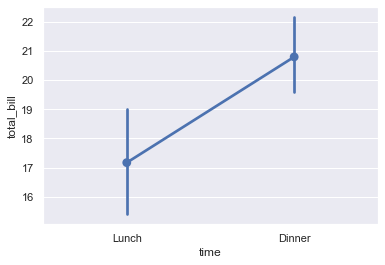

In [33]:
sns.set(style="darkgrid")

ax = sns.pointplot(x="time", y="total_bill", data=tips)

## barplot

``sns.barplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean at 0x105c7d9e0>, ci=95, n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, dodge=True, ax=None, **kwargs)`` 

Bar plot is a general plot that allows you to aggregate the categorical data based off some function, by default the mean.

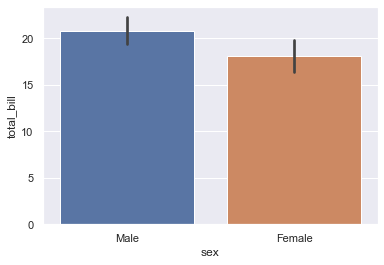

In [34]:
#default aggregation is mean
sns.barplot(x='sex',y='total_bill',data=tips)

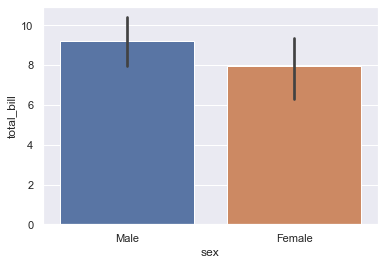

In [35]:
#aggregation can be changed to std
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)

## countplot

``sns.countplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)`` 

A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.
This is essentially the same as barplot except the estimator is explicitly counting the number of occurrences. Which is why we only pass the x value:

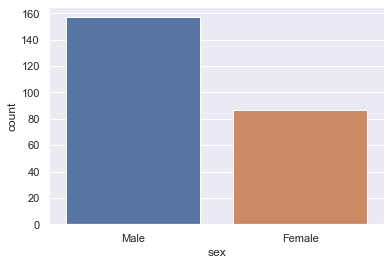

In [36]:
# amount of cases
sns.countplot(x='sex',data=tips)

## boxplot

``sns.boxplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, ax=None, **kwargs)``

A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

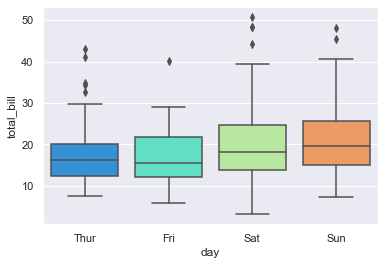

In [37]:
sns.boxplot(x="day", y="total_bill", data=tips,palette='rainbow')

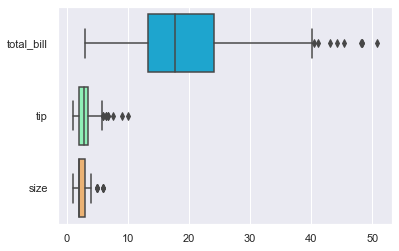

In [38]:
# Can do entire dataframe with orient='h'
sns.boxplot(data=tips,palette='rainbow',orient='h')

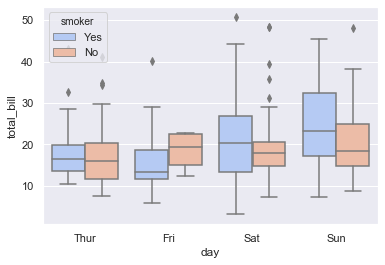

In [39]:
#can be colored using a second cathegorical variable
sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips, palette="coolwarm")

## boxen plot

``sns.boxenplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, k_depth='proportion', linewidth=None, scale='exponential', outlier_prop=None, showfliers=True, ax=None, **kwargs)``

This style of plot was originally named a “letter value” plot because it shows a large number of quantiles that are defined as “letter values”. It is similar to a box plot in plotting a nonparametric representation of a distribution in which all features correspond to actual observations. By plotting more quantiles, it provides more information about the shape of the distribution, particularly in the tails.

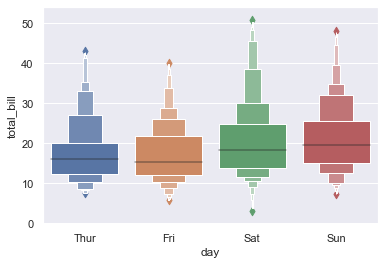

In [40]:
sns.boxenplot(x="day", y="total_bill", data=tips)

## violinplot

``seaborn.violinplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, bw='scott', cut=2, scale='area', scale_hue=True, gridsize=100, width=0.8, inner='box', split=False, dodge=True, orient=None, linewidth=None, color=None, palette=None, saturation=0.75, ax=None, **kwargs)``

A violin plot plays a similar role as a box plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

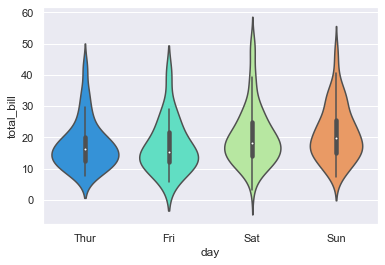

In [41]:
#one cathegorical variable
sns.violinplot(x="day", y="total_bill", data=tips,palette='rainbow')

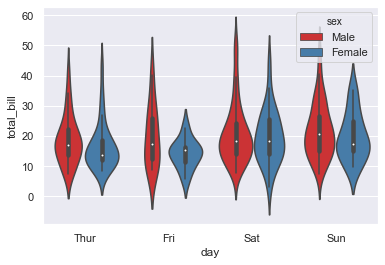

In [42]:
#second cathegorical variable
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',palette='Set1')

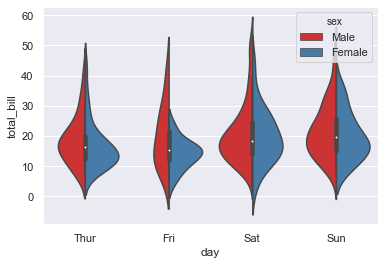

In [43]:
#direct comparison on the second variable
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',split=True,palette='Set1')

## stripplot

``sns.stripplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, jitter=True, dodge=False, orient=None, color=None, palette=None, size=5, edgecolor='gray', linewidth=0, ax=None, **kwargs)``

The stripplot will draw a scatterplot where one variable is categorical. A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

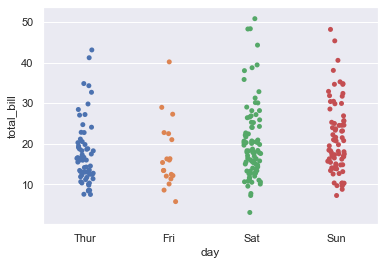

In [44]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True)

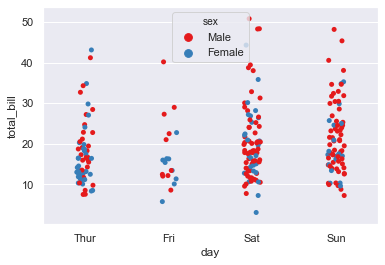

In [45]:
#colored using a second variable
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='Set1')

C:\Users\paugu\anaconda3\lib\site-packages\seaborn\categorical.py:2784: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


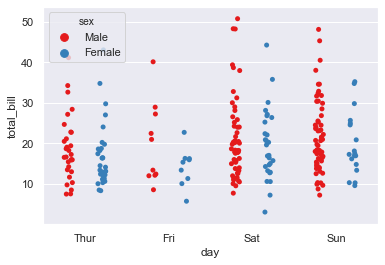

In [46]:
#adding a second cathegorical variable
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='Set1',split=True)

## swarmplot

``seaborn.swarmplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, dodge=False, orient=None, color=None, palette=None, size=5, edgecolor='gray', linewidth=0, ax=None, **kwargs)``

The swarmplot is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values, although it does not scale as well to large numbers of observations (both in terms of the ability to show all the points and in terms of the computation needed to arrange them).

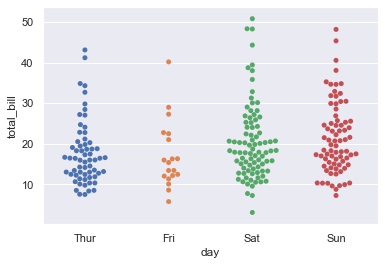

In [47]:
sns.swarmplot(x="day", y="total_bill", data=tips)

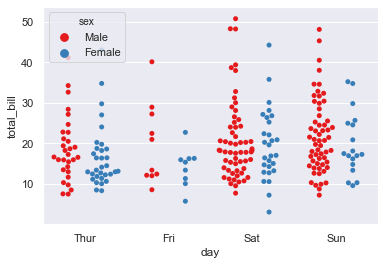

In [48]:
sns.swarmplot(x="day", y="total_bill",hue='sex',data=tips, palette="Set1", dodge=True)

### Combining Categorical Plots

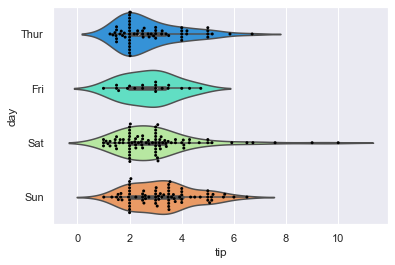

In [49]:
sns.violinplot(x="tip", y="day", data=tips,palette='rainbow')
sns.swarmplot(x="tip", y="day", data=tips,color='black',size=3)

# Matrix Plots

Matrix plots allow you to plot data as color-encoded matrices and can also be used to indicate clusters within the data (later in the machine learning section we will learn how to formally cluster data).

## Heatmap

``sns.heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)``

Plot rectangular data as a color-encoded matrix.
This is an Axes-level function and will draw the heatmap into the currently-active Axes if none is provided to the ax argument. 

In [50]:
# Matrix form for correlation data
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


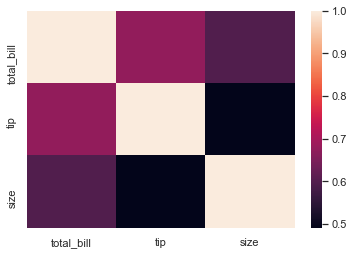

In [51]:
sns.heatmap(tips.corr())

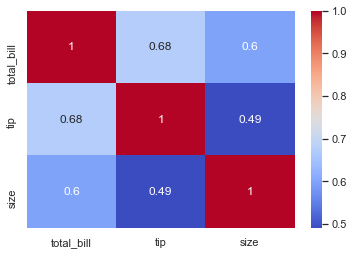

In [52]:
sns.heatmap(tips.corr(),cmap='coolwarm',annot=True)

Or for the flights data:

In [53]:
flights.pivot_table(values='passengers',index='month',columns='year')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


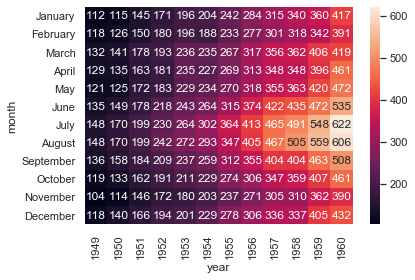

In [54]:
pvflights = flights.pivot_table(values='passengers',index='month',columns='year')
sns.heatmap(pvflights, annot=True, fmt="d")

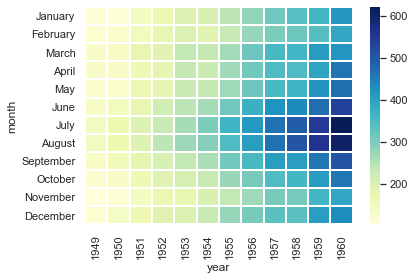

In [55]:
sns.heatmap(pvflights,cmap="YlGnBu",linecolor='white',linewidths=1)

## clustermap

``sns.clustermap(data, pivot_kws=None, method='average', metric='euclidean', z_score=None, standard_scale=None, figsize=(10, 10), cbar_kws=None, row_cluster=True, col_cluster=True, row_linkage=None, col_linkage=None, row_colors=None, col_colors=None, mask=None, dendrogram_ratio=0.2, colors_ratio=0.03, cbar_pos=(0.02, 0.8, 0.05, 0.18), tree_kws=None, **kwargs)``

The clustermap uses hierarchal clustering to produce a clustered version of the heatmap.

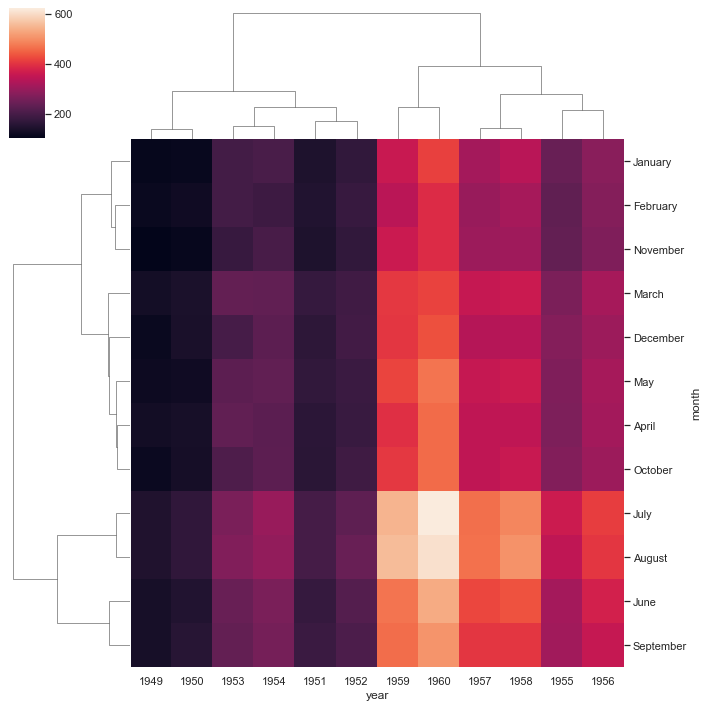

In [56]:
sns.clustermap(pvflights)

Notice now how the years and months are no longer in order, instead they are grouped by similarity in value (passenger count). That means we can begin to infer things from this plot, such as August and July being similar (makes sense, since they are both summer travel months)

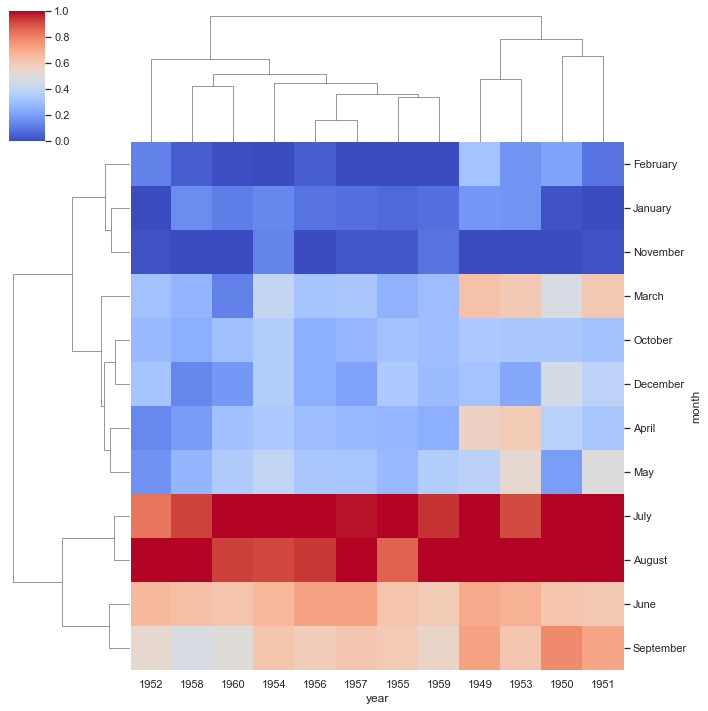

In [57]:
# More options to get the information a little clearer like normalization
sns.clustermap(pvflights,cmap='coolwarm',standard_scale=1)

# Grids

Grids are general types of plots that allow you to map plot types to rows and columns of a grid, this helps you create similar plots separated by features.

## PairGrid

``sns.PairGrid(data, hue=None, hue_order=None, palette=None, hue_kws=None, vars=None, x_vars=None, y_vars=None, corner=False, diag_sharey=True, height=2.5, aspect=1, layout_pad=0, despine=True, dropna=True, size=None)``

Pairgrid is a subplot grid for plotting pairwise relationships in a dataset.

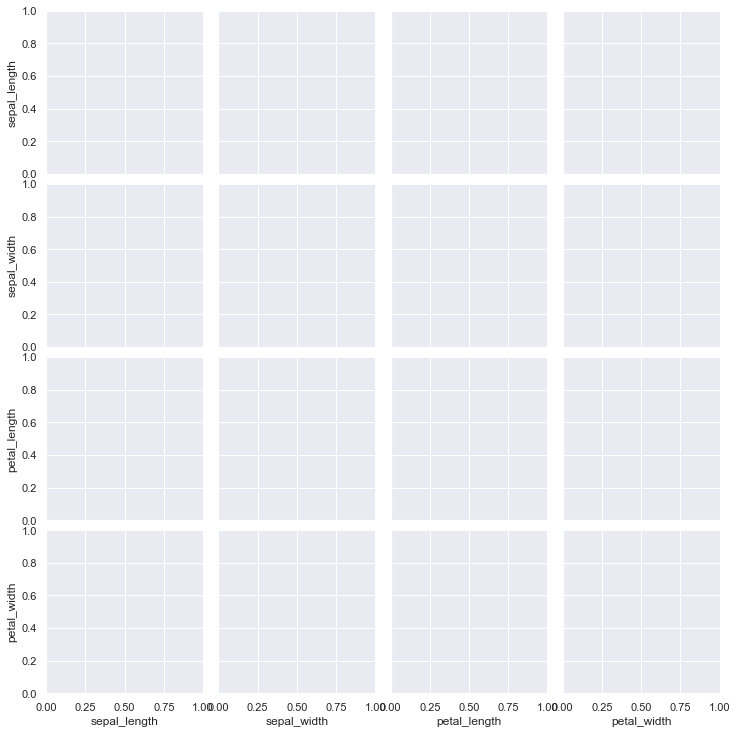

In [58]:
# Just the Grid
sns.PairGrid(iris)

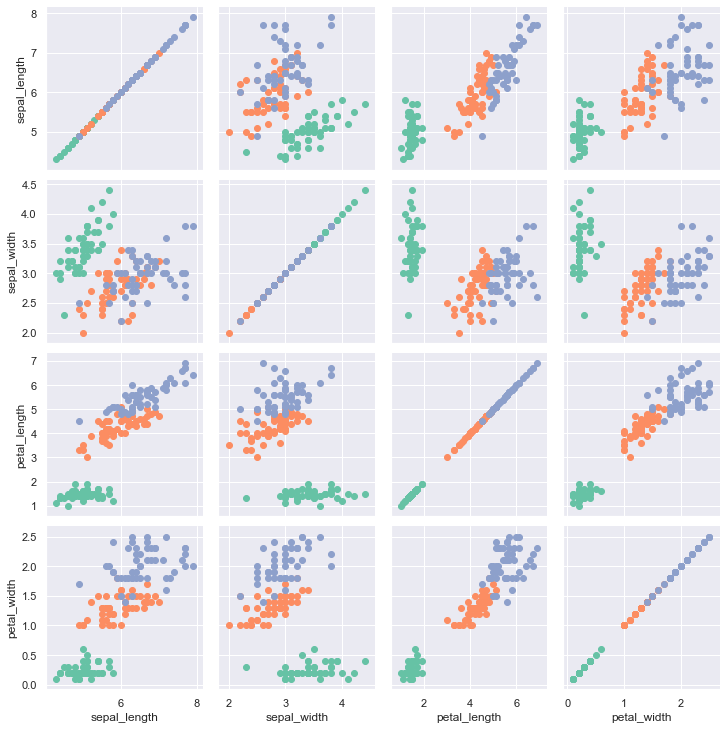

In [59]:
# Then you map to the grid
g = sns.PairGrid(iris, hue="species", palette="Set2")
g.map(plt.scatter)

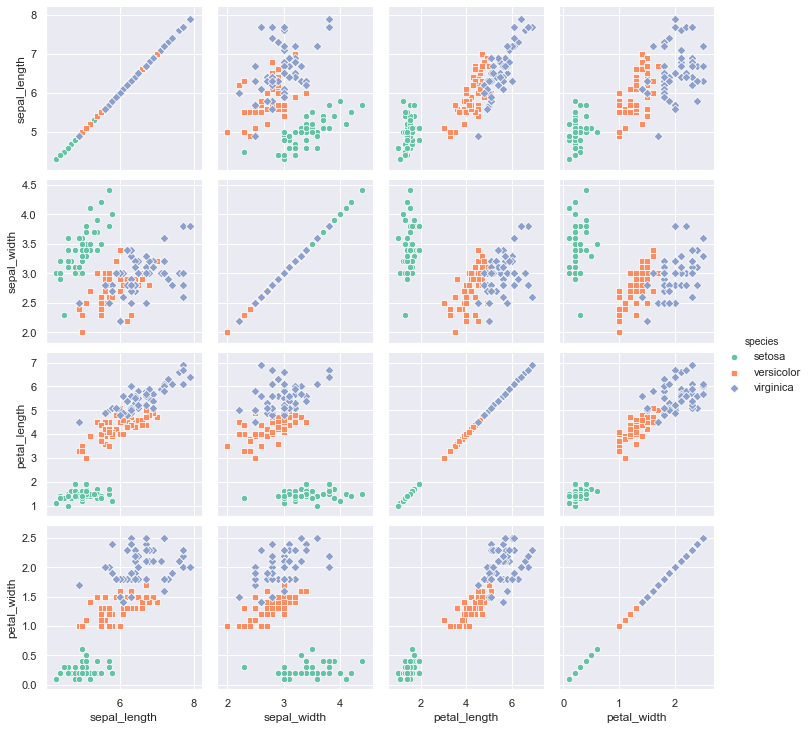

In [60]:
g = sns.PairGrid(iris, hue="species", palette="Set2", hue_kws={"marker": ["o", "s", "D"]})
g = g.map(sns.scatterplot, linewidths=1, edgecolor="w", s=40)
g = g.add_legend()

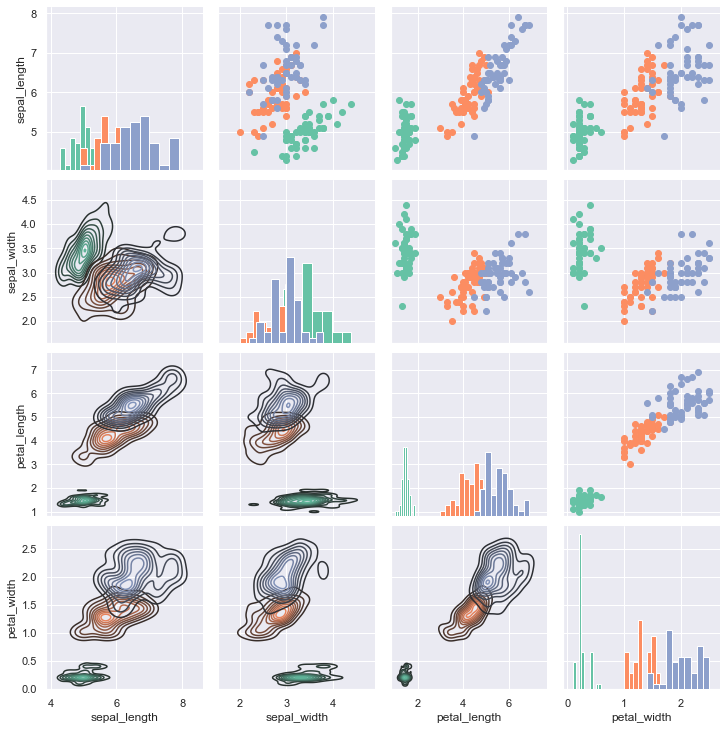

In [61]:
# Map to upper,lower, and diagonal
g = sns.PairGrid(iris, hue = 'species', palette="Set2")
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

## pairplot

``sns.PairGrid(data, hue=None, hue_order=None, palette=None, hue_kws=None, vars=None, x_vars=None, y_vars=None, corner=False, diag_sharey=True, height=2.5, aspect=1, layout_pad=0, despine=True, dropna=True, size=None)``

PairGrid is flexible, but to take a quick look at a dataset, it can be easier to use pairplot(). This function uses scatterplots and histograms by default, although a few other kinds will be added (currently, you can also plot regression plots on the off-diagonals and KDEs on the diagonal).

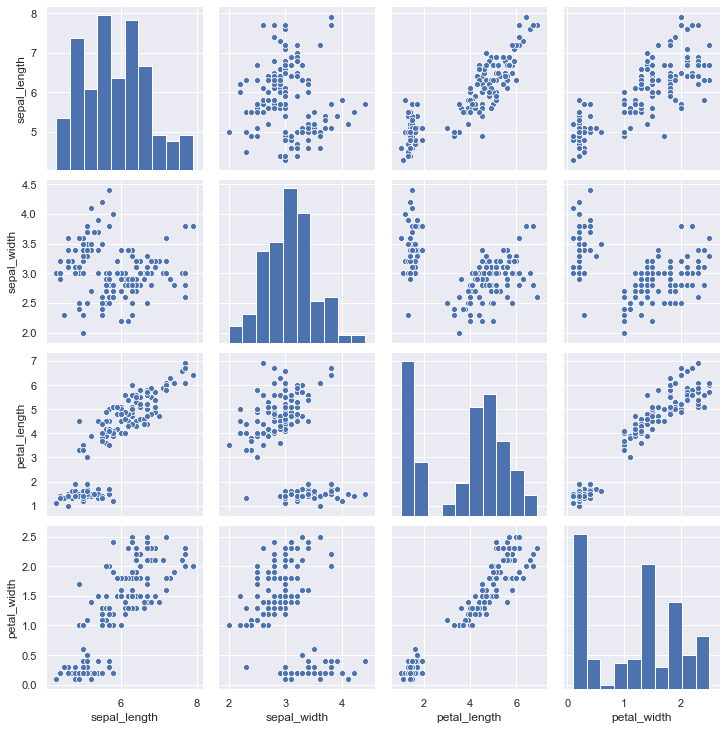

In [62]:
sns.pairplot(iris)

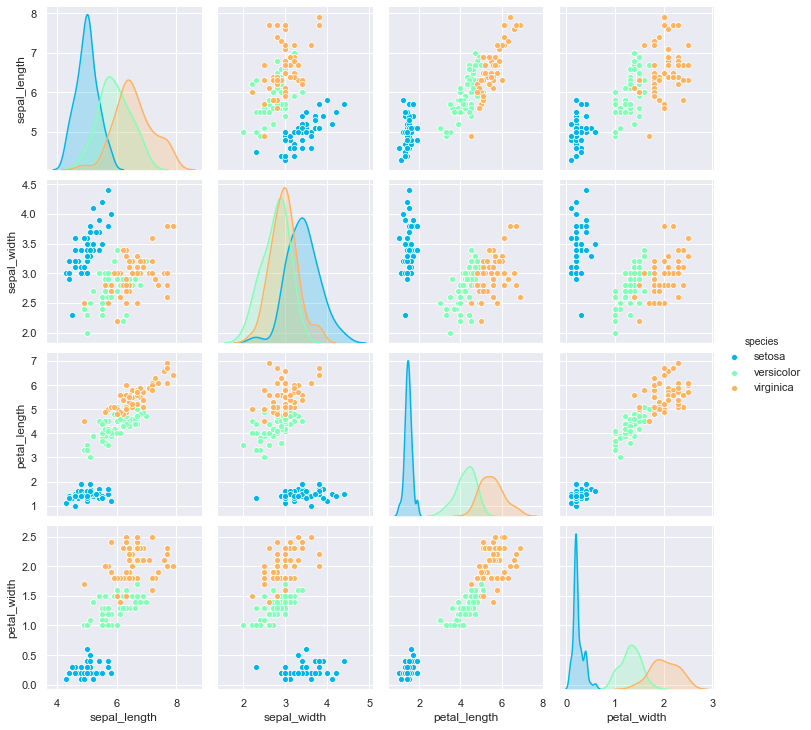

In [63]:
sns.pairplot(iris,hue='species',palette='rainbow')

## Facet Grid

``sns.FacetGrid(data, row=None, col=None, hue=None, col_wrap=None, sharex=True, sharey=True, height=3, aspect=1, palette=None, row_order=None, col_order=None, hue_order=None, hue_kws=None, dropna=True, legend_out=True, despine=True, margin_titles=False, xlim=None, ylim=None, subplot_kws=None, gridspec_kws=None, size=None)``

Multi-plot grid for plotting conditional relationships.

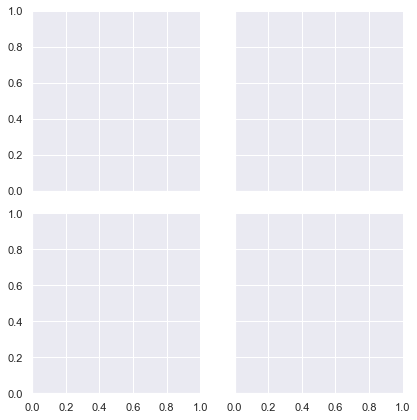

In [64]:
# Just the Grid
g = sns.FacetGrid(tips, col="time", row="smoker")

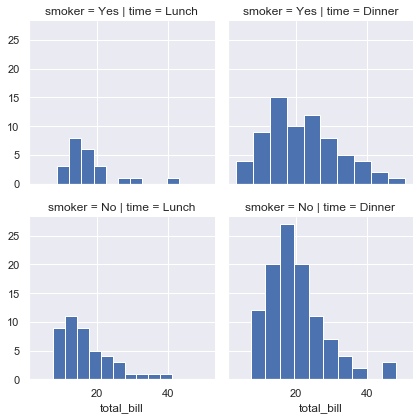

In [65]:
g = sns.FacetGrid(tips, col="time",  row="smoker")
g = g.map(plt.hist, "total_bill")

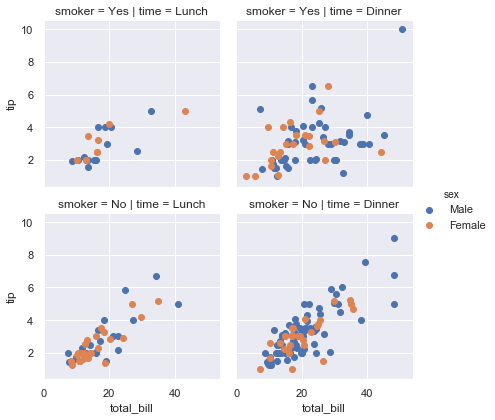

In [66]:
g = sns.FacetGrid(tips, col="time",  row="smoker",hue='sex')
# Notice hwo the arguments come after plt.scatter call
g = g.map(plt.scatter, "total_bill", "tip").add_legend()

## JointGrid

JointGrid is the general version for jointplot() type grids, for a quick example:

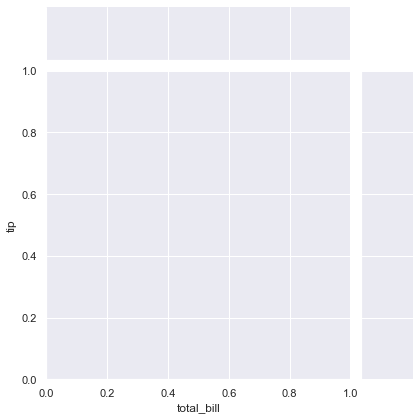

In [67]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)

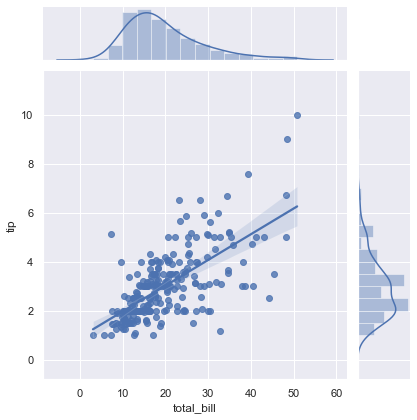

In [68]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)
g = g.plot(sns.regplot, sns.distplot)

# Grids

Grids are general types of plots that allow you to map plot types to rows and columns of a grid, this helps you create similar plots separated by features.

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
iris = sns.load_dataset('iris')

In [71]:
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## PairGrid

Pairgrid is a subplot grid for plotting pairwise relationships in a dataset.

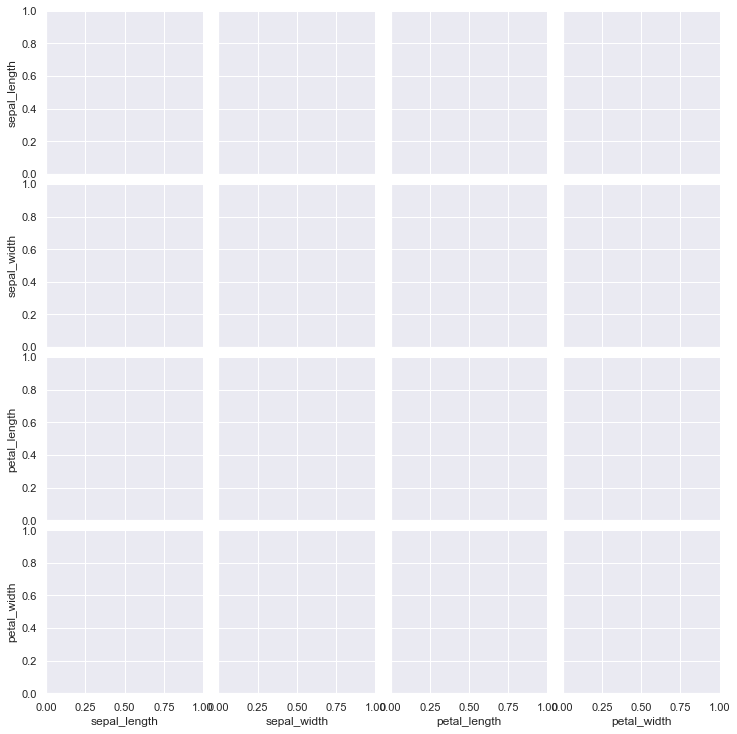

In [72]:
# Just the Grid
sns.PairGrid(iris)

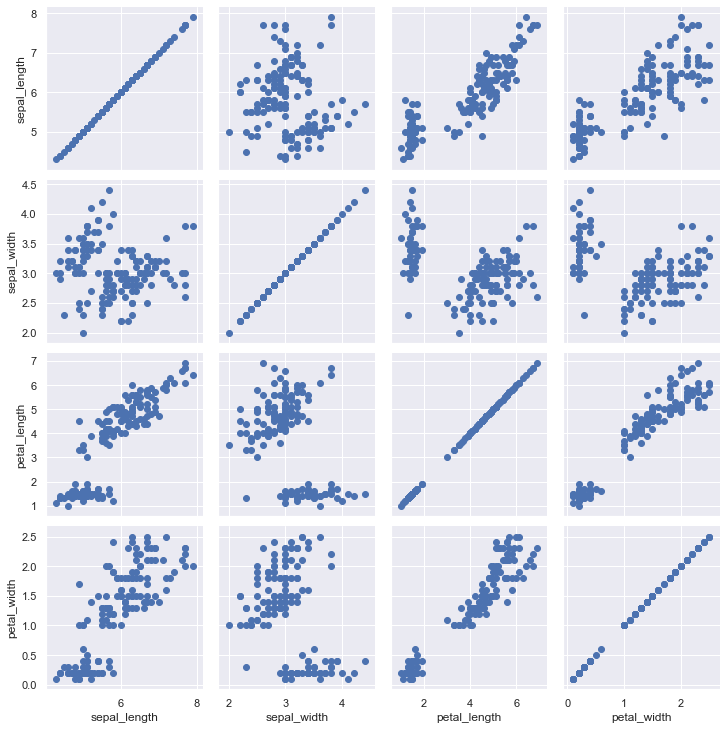

In [73]:
# Then you map to the grid
g = sns.PairGrid(iris)
g.map(plt.scatter)

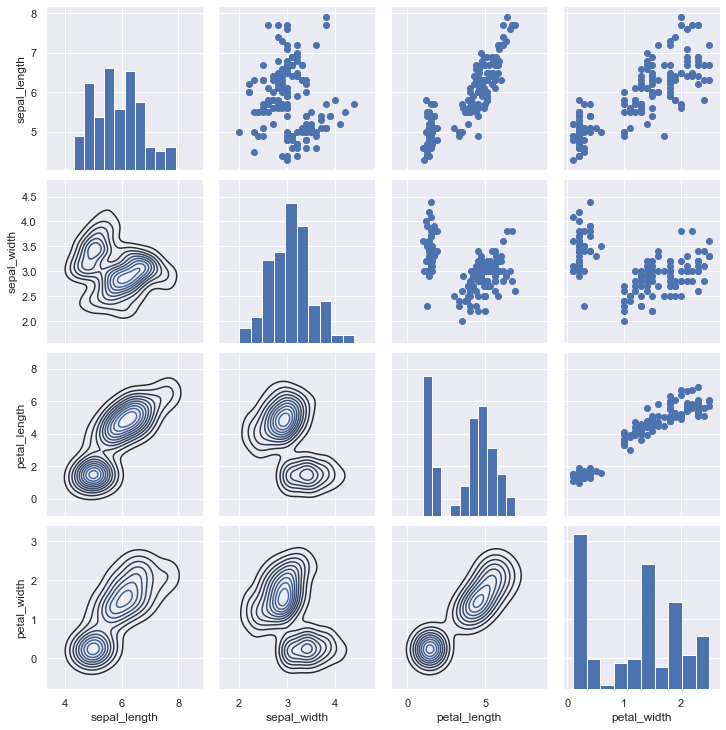

In [74]:
# Map to upper,lower, and diagonal
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

## pairplot

pairplot is a simpler version of PairGrid (you'll use quite often)

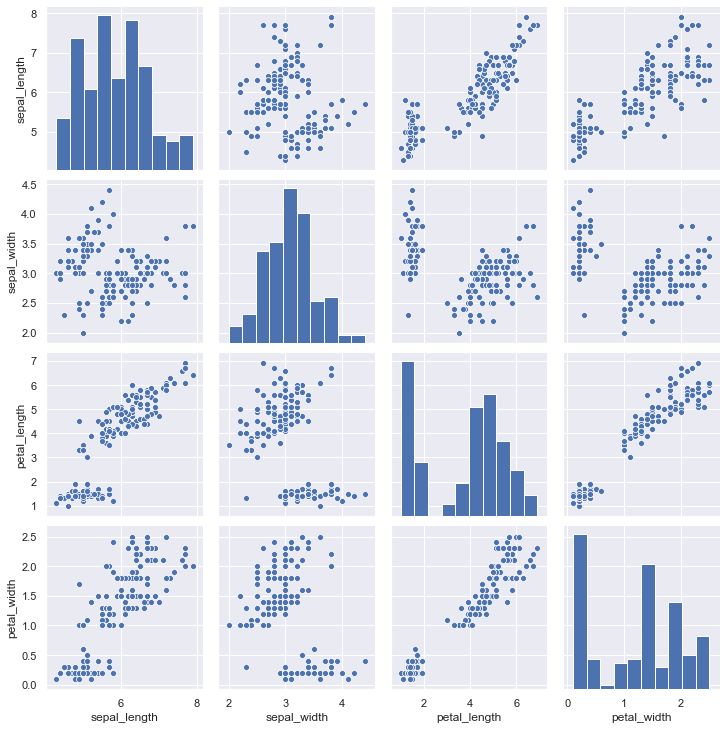

In [75]:
sns.pairplot(iris)

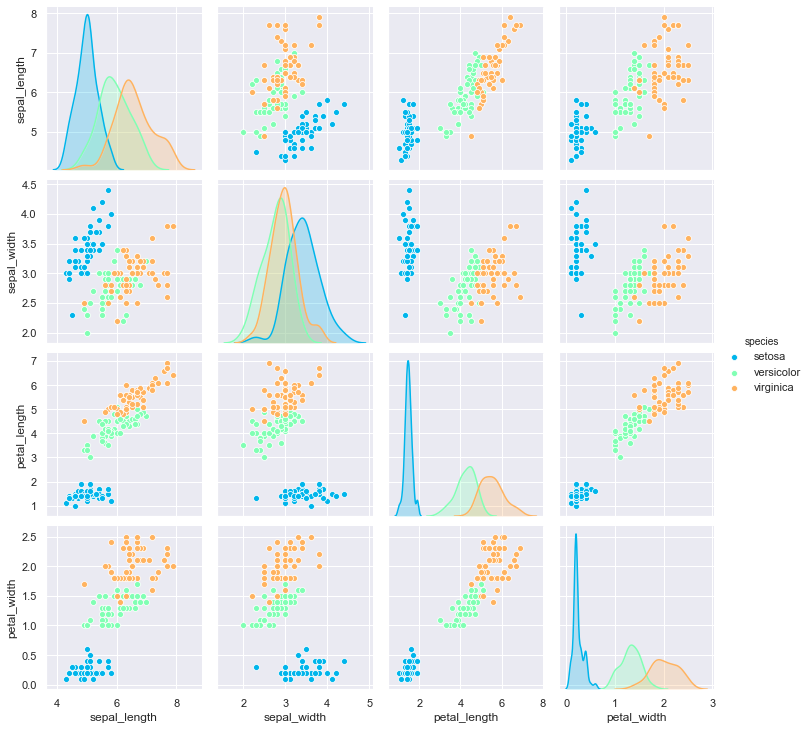

In [76]:
sns.pairplot(iris,hue='species',palette='rainbow')

## Facet Grid

FacetGrid is the general way to create grids of plots based off of a feature:

In [77]:
tips = sns.load_dataset('tips')

In [78]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


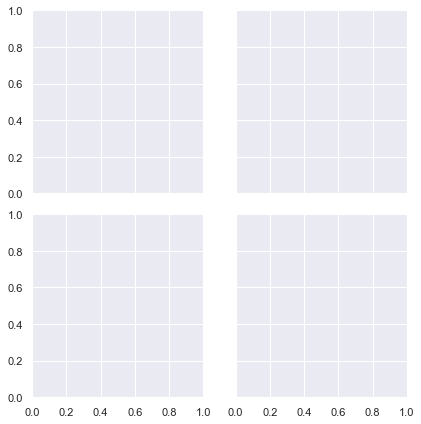

In [79]:
# Just the Grid
g = sns.FacetGrid(tips, col="time", row="smoker")

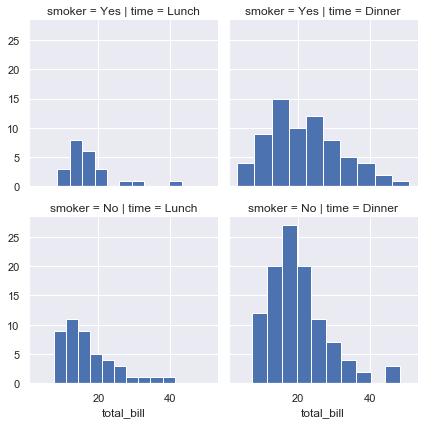

In [80]:
g = sns.FacetGrid(tips, col="time",  row="smoker")
g = g.map(plt.hist, "total_bill")

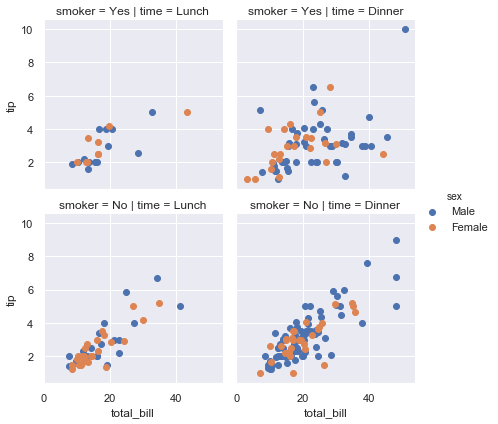

In [81]:
g = sns.FacetGrid(tips, col="time",  row="smoker",hue='sex')
# Notice hwo the arguments come after plt.scatter call
g = g.map(plt.scatter, "total_bill", "tip").add_legend()

# Figure aesthetics

## Styles

You can set particular styles:

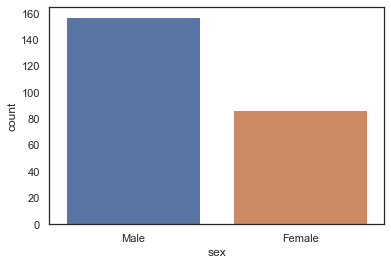

In [82]:
sns.set_style('white')
sns.countplot(x='sex',data=tips)

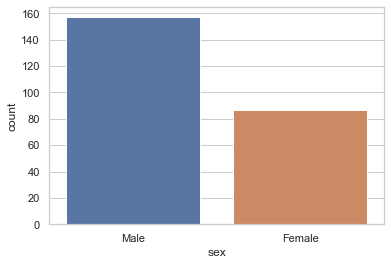

In [83]:
sns.set_style('whitegrid')
sns.countplot(x='sex',data=tips)

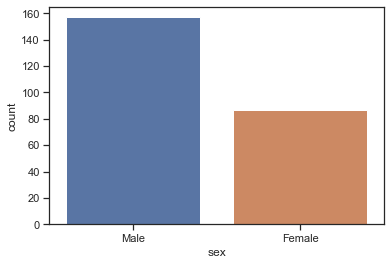

In [84]:
sns.set_style('ticks')
sns.countplot(x='sex',data=tips,palette='deep')

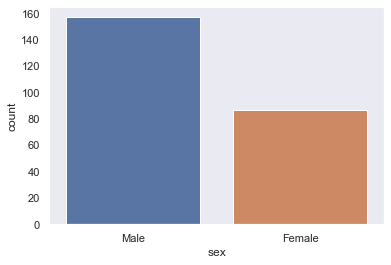

In [85]:
sns.set_style('dark')
sns.countplot(x='sex',data=tips,palette='deep')

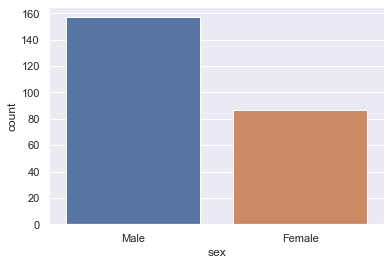

In [86]:
sns.set_style('darkgrid')
sns.countplot(x='sex',data=tips,palette='deep')

## Spine Removal

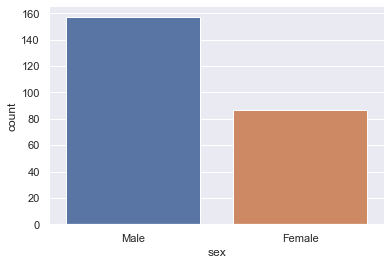

In [87]:
sns.countplot(x='sex',data=tips)
sns.despine()

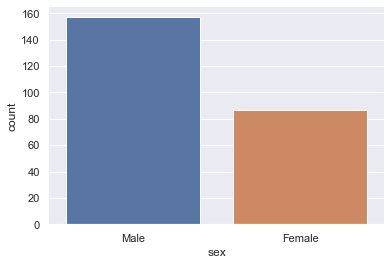

In [88]:
sns.countplot(x='sex',data=tips)
sns.despine(left=True)

## Size and Aspect

You can use matplotlib's **plt.figure(figsize=(width,height) ** to change the size of most seaborn plots.

You can control the size and aspect ratio of most seaborn grid plots by passing in parameters: size, and aspect. For example:

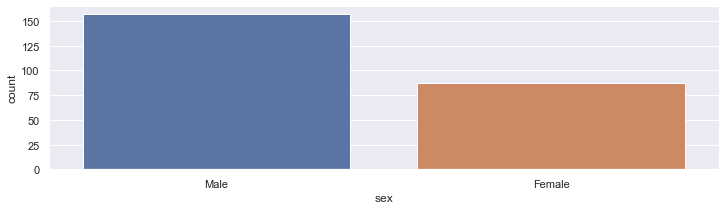

In [89]:
# Non Grid Plot
plt.figure(figsize=(12,3))
sns.countplot(x='sex',data=tips)

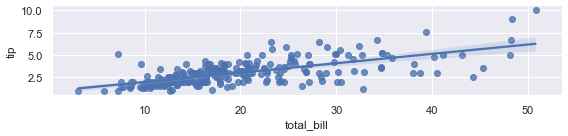

In [90]:
# Grid Type Plot
sns.lmplot(x='total_bill',y='tip',height=2,aspect=4,data=tips)

## Scale and Context

The set_context() allows you to override default parameters:

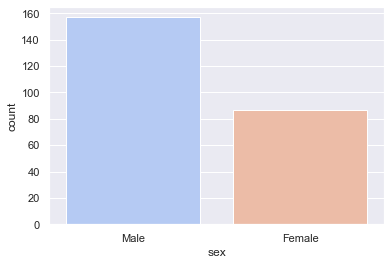

In [91]:
sns.set_context('notebook')
sns.countplot(x='sex',data=tips,palette='coolwarm')

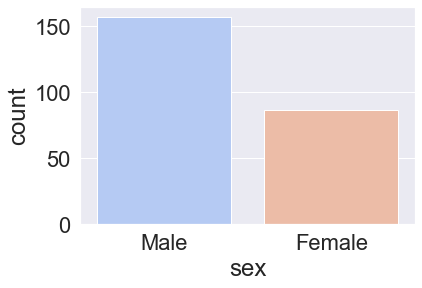

In [92]:
sns.set_context('notebook',font_scale=2)
sns.countplot(x='sex',data=tips,palette='coolwarm')

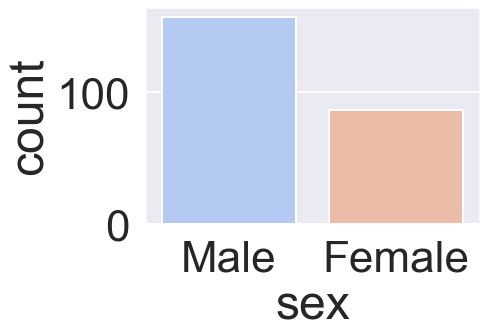

In [93]:
sns.set_context('poster',font_scale=2)
sns.countplot(x='sex',data=tips,palette='coolwarm')

## Color

![color by name](https://matplotlib.org/_images/named_colors.png)
![qualitative colors](https://matplotlib.org/_images/sphx_glr_colormaps_006.png)
![diverging colormaps](https://matplotlib.org/_images/sphx_glr_colormaps_004.png)
![secuential colormaps1](https://matplotlib.org/_images/sphx_glr_colormaps_002.png)
![secuential colormaps2](https://matplotlib.org/_images/sphx_glr_colormaps_003.png)
![cycling colormaps](https://matplotlib.org/_images/sphx_glr_colormaps_005.png)
![miscelaneus](https://matplotlib.org/_images/sphx_glr_colormaps_007.png)
![uniform](https://matplotlib.org/_images/sphx_glr_colormaps_001.png)